<a href="https://colab.research.google.com/github/SampannaMishra/Car_Dekho_Project/blob/main/Sampanna_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the data 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter/Self Project/Copy of CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
df.shape

(4340, 8)

In [ ]:
data_car = df.copy()

**Data Inspection**

In [ ]:
data_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# getting to know more about the datatypes of the feartures
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
data_car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# **Exploratory Data Analysis**
In this segment exploratory data analysis have been done to find relationships among independent and dependent features. 
Features have been segmented into numerical features and categorical features for further analysis.
Correlation graph has been plotted among the numerical features.

In [ ]:
numeric_features = data_car.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

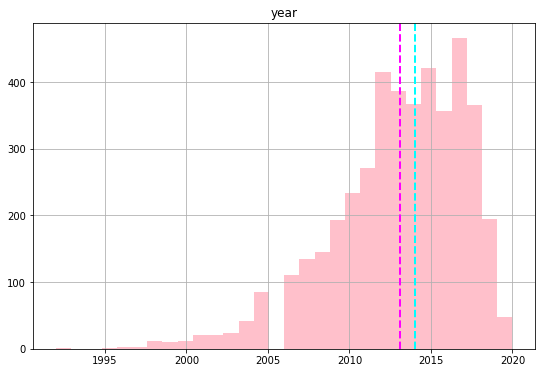

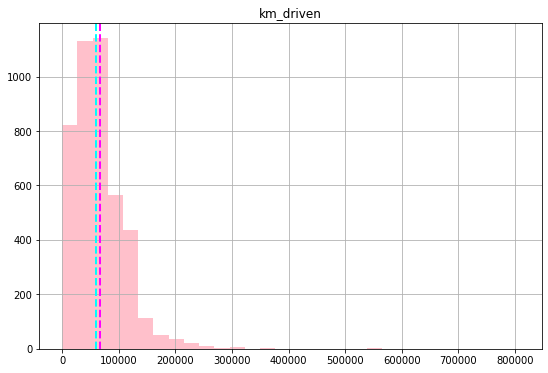

In [ ]:
for col in numeric_features:
  if col != 'selling_price':
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = data_car[col]
   feature.hist(bins=30,ax=ax,color="pink")
   ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
   ax.set_title(col)
plt.show()
     

**From the above km subplot it is evident that between the years 2011 to 2016 sell of cars has increased.
From subplot of kilometer it can be observed that mean is about 70000 km.**

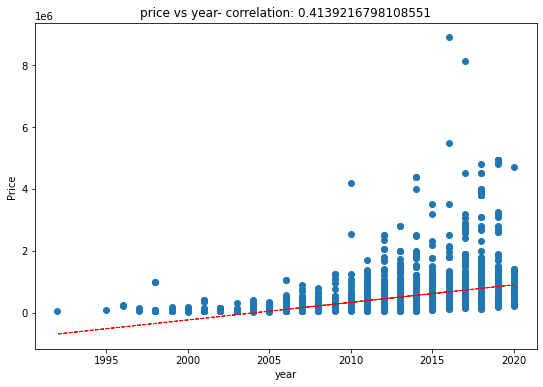

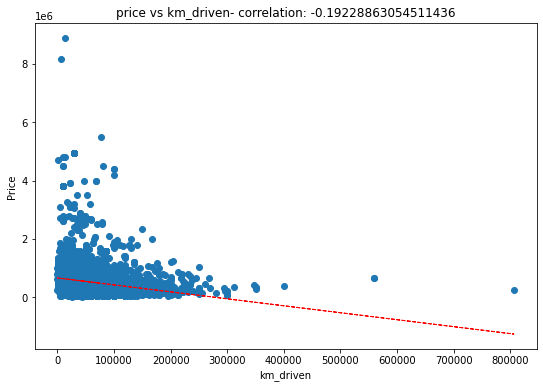

In [ ]:
for col in numeric_features:
   if col!= 'selling_price':
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data_car[col]
    label = data_car['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data_car[col], data_car['selling_price'], 1)
    y_hat = np.poly1d(z)(data_car[col])

    plt.plot(data_car[col], y_hat, "r--", lw=1)

plt.show()

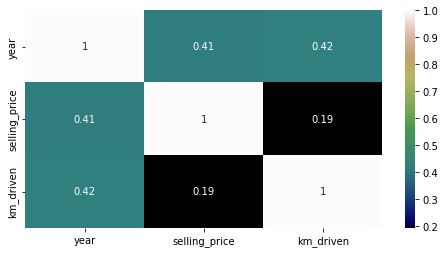

In [ ]:
plt.figure(figsize = (8,4))
correlation = data_car.corr()
sns.heatmap(abs(correlation),annot=True,cmap='gist_earth')

From the above heatmap it can be observed that there is no significant correlation among the independent variables.

In [ ]:
data_car['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

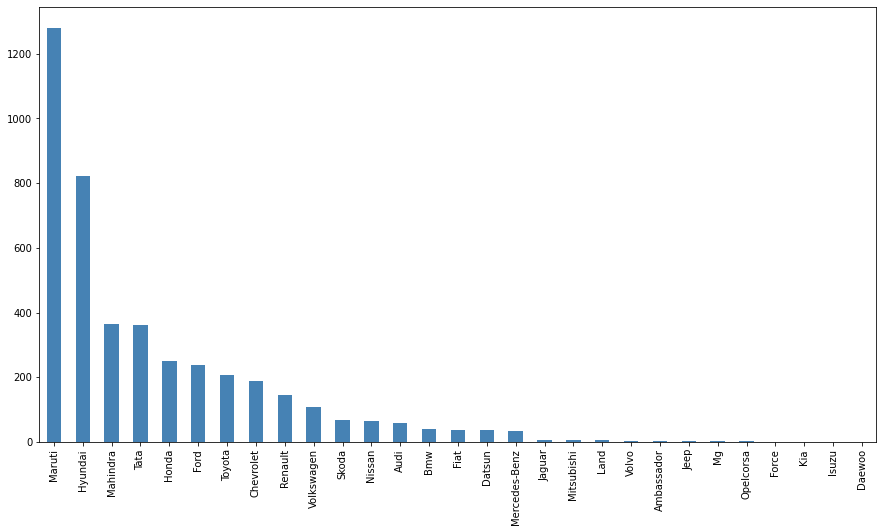

In [ ]:
# car which sold the most no.of cars
data_car['company'] = data_car['name'].str.split(" ",expand=True)[0]


data_car['company'] = data_car['company'].str.title()
Frequency = data_car['company'].value_counts()
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
Frequency.plot.bar(ax = ax, color='steelblue')

From the above plot it can be concluded that Maruti is the highest selling car. Followed by Hyundai and Mahindra.

In [ ]:
categorical_features = data_car.describe(include=['object']).columns

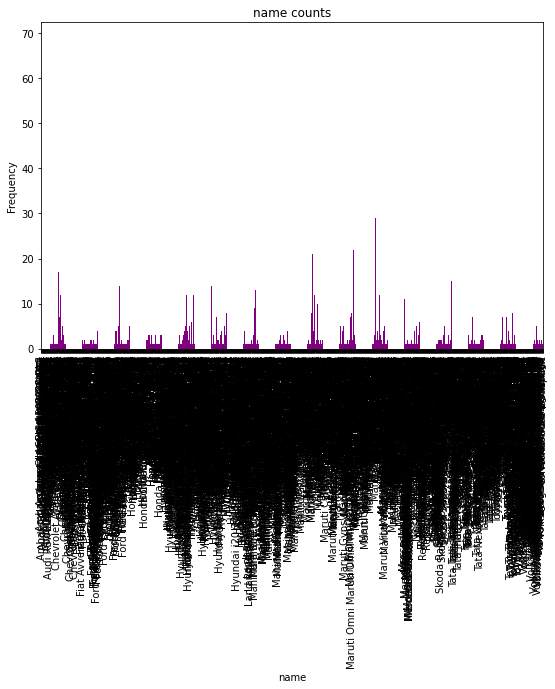

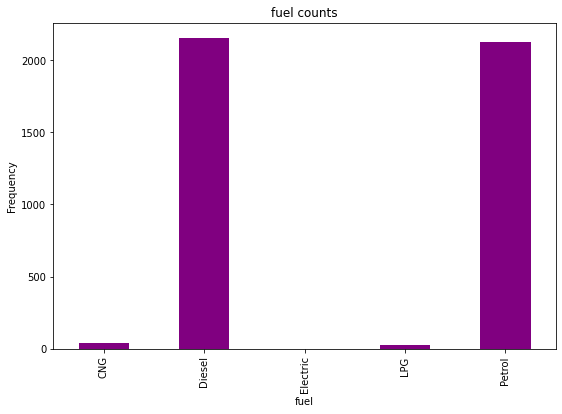

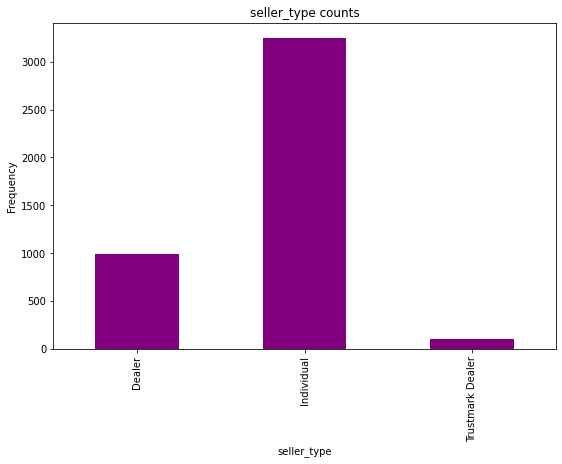

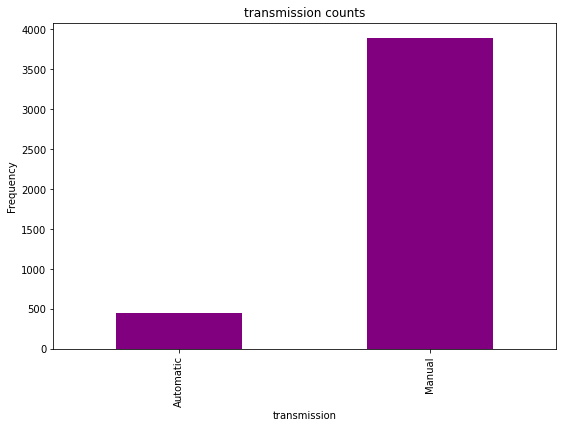

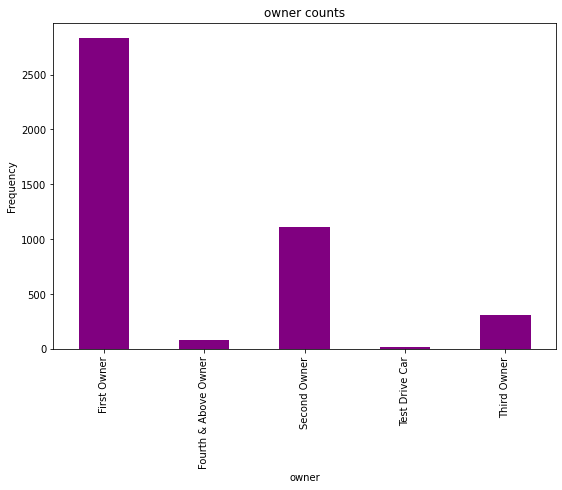

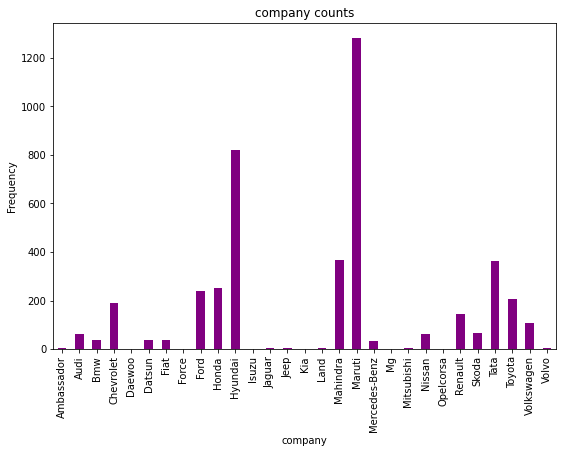

In [ ]:
for col in categorical_features:
    counts = data_car[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='purple')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
data_car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [ ]:
data_car['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
df1 = pd.get_dummies(data_car['owner'])

In [ ]:
df1.head()

,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


In [ ]:
data_car = pd.concat([df1,data_car],axis=1)

In [ ]:
# since test drive and fourth above owner very less in number as compared to other categories so these two can be dropped. Also dtop the original owner column.
data_car= data_car.drop(['Test Drive Car','Fourth & Above Owner'],axis = 1)

In [ ]:
data_car.head()

,First Owner,Second Owner,Third Owner,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
0,1,0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,1,0,0,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,1,0,0,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,1,0,0,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,0,1,0,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [ ]:
df2 = pd.get_dummies(data_car['transmission'])

In [ ]:
data_car['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [ ]:
data_car = pd.concat([df2,data_car],axis=1)

In [ ]:
data_car= data_car.drop(['transmission'],axis = 1)

In [ ]:
data_car.head()

,Automatic,Manual,First Owner,Second Owner,Third Owner,name,year,selling_price,km_driven,fuel,seller_type,owner,company
0,0,1,1,0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,First Owner,Maruti
1,0,1,1,0,0,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,First Owner,Maruti
2,0,1,1,0,0,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,First Owner,Hyundai
3,0,1,1,0,0,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,First Owner,Datsun
4,0,1,0,1,0,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Second Owner,Honda


In [ ]:
data_car['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [ ]:
df3 = pd.get_dummies(data_car['seller_type'])

In [ ]:
data_car = pd.concat([df3,data_car],axis = 1)

In [ ]:
data_car = data_car.drop(['Trustmark Dealer'],axis = 1)

In [ ]:
data_car.head()

,Dealer,Individual,Automatic,Manual,First Owner,Second Owner,Third Owner,name,year,selling_price,km_driven,fuel,seller_type,owner,company
0,0,1,0,1,1,0,0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,First Owner,Maruti
1,0,1,0,1,1,0,0,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,First Owner,Maruti
2,0,1,0,1,1,0,0,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,First Owner,Hyundai
3,0,1,0,1,1,0,0,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,First Owner,Datsun
4,0,1,0,1,0,1,0,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Second Owner,Honda


In [ ]:
df4 = pd.get_dummies(data_car['fuel'])

In [ ]:
data_car = pd.concat([df4,data_car],axis = 1)

In [ ]:
data_car = data_car.drop(['fuel'],axis = 1)

In [ ]:
data_car.head()

,CNG,Diesel,Electric,LPG,Petrol,Dealer,Individual,Automatic,Manual,First Owner,Second Owner,Third Owner,name,year,selling_price,km_driven,seller_type,owner,company
0,0,0,0,0,1,0,1,0,1,1,0,0,Maruti 800 AC,2007,60000,70000,Individual,First Owner,Maruti
1,0,0,0,0,1,0,1,0,1,1,0,0,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,First Owner,Maruti
2,0,1,0,0,0,0,1,0,1,1,0,0,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,First Owner,Hyundai
3,0,0,0,0,1,0,1,0,1,1,0,0,Datsun RediGO T Option,2017,250000,46000,Individual,First Owner,Datsun
4,0,1,0,0,0,0,1,0,1,0,1,0,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Second Owner,Honda


In [ ]:
data_car = data_car.drop(['CNG','Electric','LPG'],axis = 1)

In [ ]:
data_car.head()

,Diesel,Petrol,Dealer,Individual,Automatic,Manual,First Owner,Second Owner,Third Owner,name,year,selling_price,km_driven,seller_type,owner,company
0,0,1,0,1,0,1,1,0,0,Maruti 800 AC,2007,60000,70000,Individual,First Owner,Maruti
1,0,1,0,1,0,1,1,0,0,Maruti Wagon R LXI Minor,2007,135000,50000,Individual,First Owner,Maruti
2,1,0,0,1,0,1,1,0,0,Hyundai Verna 1.6 SX,2012,600000,100000,Individual,First Owner,Hyundai
3,0,1,0,1,0,1,1,0,0,Datsun RediGO T Option,2017,250000,46000,Individual,First Owner,Datsun
4,1,0,0,1,0,1,0,1,0,Honda Amaze VX i-DTEC,2014,450000,141000,Individual,Second Owner,Honda


In [ ]:
data_car = data_car.drop(['seller_type'],axis=True)

In [ ]:
data_car = data_car.drop(['owner'],axis = True)

In [ ]:
data_car.head()

,Diesel,Petrol,Dealer,Individual,Automatic,Manual,First Owner,Second Owner,Third Owner,name,year,selling_price,km_driven,company
0,0,1,0,1,0,1,1,0,0,Maruti 800 AC,2007,60000,70000,Maruti
1,0,1,0,1,0,1,1,0,0,Maruti Wagon R LXI Minor,2007,135000,50000,Maruti
2,1,0,0,1,0,1,1,0,0,Hyundai Verna 1.6 SX,2012,600000,100000,Hyundai
3,0,1,0,1,0,1,1,0,0,Datsun RediGO T Option,2017,250000,46000,Datsun
4,1,0,0,1,0,1,0,1,0,Honda Amaze VX i-DTEC,2014,450000,141000,Honda


In [ ]:
data_car = data_car.drop(['name'],axis = True)
data_car.head()

In [ ]:
data_car.head()

,Diesel,Petrol,Dealer,Individual,Automatic,Manual,First Owner,Second Owner,Third Owner,year,selling_price,km_driven,company
0,0,1,0,1,0,1,1,0,0,2007,60000,70000,Maruti
1,0,1,0,1,0,1,1,0,0,2007,135000,50000,Maruti
2,1,0,0,1,0,1,1,0,0,2012,600000,100000,Hyundai
3,0,1,0,1,0,1,1,0,0,2017,250000,46000,Datsun
4,1,0,0,1,0,1,0,1,0,2014,450000,141000,Honda


In [ ]:
data_car.company.value_counts().sort_values(ascending=False).head(20)

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
Bmw                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Name: company, dtype: int64

In [ ]:
# list of most frequent categories of variables
top_ten = [x for x in data_car.company.value_counts().sort_values(ascending=False).head(10).index]
top_ten

['Maruti',
 'Hyundai',
 'Mahindra',
 'Tata',
 'Honda',
 'Ford',
 'Toyota',
 'Chevrolet',
 'Renault',
 'Volkswagen']

In [ ]:
# use label encoding to company column

for label in top_ten:
  data_car[label] = np.where(data_car['company']==label,1,0)

In [ ]:
df5 =  data_car[['company']+top_ten].head(40)

In [ ]:
data_car = pd.concat([df5,data_car],axis = 1)

In [ ]:
data_car.head()

,company,Maruti,Hyundai,Mahindra,Tata,Honda,Ford,Toyota,Chevrolet,Renault,Volkswagen,Diesel,Petrol,Dealer,Individual,Automatic,Manual,First Owner,Second Owner,Third Owner,year,selling_price,km_driven,company,Maruti,Hyundai,Mahindra,Tata,Honda,Ford,Toyota,Chevrolet,Renault,Volkswagen
0,Maruti,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,1,0,0,2007,60000,70000,Maruti,1,0,0,0,0,0,0,0,0,0
1,Maruti,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,1,0,0,2007,135000,50000,Maruti,1,0,0,0,0,0,0,0,0,0
2,Hyundai,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,1,0,0,2012,600000,100000,Hyundai,0,1,0,0,0,0,0,0,0,0
3,Datsun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,1,1,0,0,2017,250000,46000,Datsun,0,0,0,0,0,0,0,0,0,0
4,Honda,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1,0,2014,450000,141000,Honda,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_car = data_car.iloc[:,[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]

In [ ]:
data_car.head()

,Diesel,Petrol,Dealer,Individual,Automatic,Manual,First Owner,Second Owner,Third Owner,year,selling_price,km_driven,company,Maruti,Hyundai,Mahindra,Tata,Honda,Ford,Toyota,Chevrolet,Renault,Volkswagen
0,0,1,0,1,0,1,1,0,0,2007,60000,70000,Maruti,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,0,0,2007,135000,50000,Maruti,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,1,0,0,2012,600000,100000,Hyundai,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,1,0,0,2017,250000,46000,Datsun,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,1,0,2014,450000,141000,Honda,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_car = data_car.drop(['company'],axis=1)

In [ ]:
data_car.head()

In [ ]:
dependent_variable = 'selling_price'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(data_car.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['Toyota',
 'Chevrolet',
 'Renault',
 'Dealer',
 'Mahindra',
 'Automatic',
 'Diesel',
 'Individual',
 'Ford',
 'km_driven',
 'Third Owner',
 'year',
 'Second Owner',
 'First Owner',
 'Hyundai',
 'Petrol',
 'Maruti',
 'Tata',
 'Manual',
 'Volkswagen',
 'Honda']

In [ ]:
# Create the data of independent variables
X = data_car[independent_variables].values

# Create the dependent variable data
y = data_car[dependent_variable].values

In [ ]:
data_car[independent_variables]

,Toyota,Chevrolet,Renault,Dealer,Mahindra,Automatic,Diesel,Individual,Ford,km_driven,Third Owner,year,Second Owner,First Owner,Hyundai,Petrol,Maruti,Tata,Manual,Volkswagen,Honda
0,0,0,0,0,0,0,0,1,0,70000,0,2007,0,1,0,1,1,0,1,0,0
1,0,0,0,0,0,0,0,1,0,50000,0,2007,0,1,0,1,1,0,1,0,0
2,0,0,0,0,0,0,1,1,0,100000,0,2012,0,1,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,46000,0,2017,0,1,0,1,0,0,1,0,0
4,0,0,0,0,0,0,1,1,0,141000,0,2014,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0,0,0,0,0,0,1,1,0,80000,0,2014,1,0,1,0,0,0,1,0,0
4336,0,0,0,0,0,0,1,1,0,80000,0,2014,1,0,1,0,0,0,1,0,0
4337,0,0,0,0,0,0,0,1,0,83000,0,2009,1,0,0,1,1,0,1,0,0
4338,0,0,0,0,0,0,1,1,0,90000,0,2016,0,1,1,0,0,0,1,0,0


### **Train test split**

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train[0:10]

### **Feature Scaling**

In [ ]:
# transform
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

### **Using Linear Regression Algorithm**

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

1.0661604700545027e+18

In [ ]:
regressor.coef_

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred_train

array([341376., 716416., -36608., ..., 875008., 471040., 215424.])

In [ ]:
y_train

array([300000, 600000,  95000, ..., 270000, 600000, 229999])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Predicted profit on the test data
y_pred

In [ ]:
# Actual profits on test data
y_test

In [ ]:
mean_squared_error(y_test, y_pred)

157268606811.22696

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

399932.5205754956

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

396571.06148990116

In [ ]:
r2_score(y_train, y_pred_train)

0.508274748359602

In [ ]:
r2_score(y_test, y_pred)

0.5764963041619499

In [ ]:
# fit OLS model with intercept on independent variables

import statsmodels.api as sm
X = sm.add_constant(X) 
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     237.8
Date:                Wed, 29 Dec 2021   Prob (F-statistic):               0.00
Time:                        15:19:51   Log-Likelihood:                -62131.
No. Observations:                4340   AIC:                         1.243e+05
Df Residuals:                    4319   BIC:                         1.244e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.71e+07   2.41e+06    -19.577      0.000   -5.18e+07   -4.24e+07
x1         -7.927e+04   3.58e+04     -2.213      0.027    -1.5e+05   -9029.326
x2         -5.825e+05   3.72e+04    -15.659      0.000   -6.55e+05    -5.1e+05
x3         -5.725e+05   4.05e+04    -14.142      0.000   -6.52e+05   -4.93e+05
x4         -1.806e+05   4.24e+04     -4.265      0.000   -2.64e+05   -9.76e+04
x5         -3.914e+05   3.11e+04    -12.602      0.000   -4.52e+05    -3.3e+05
x6          -2.32e+07    1.2e+06    -19.276      0.000   -2.56e+07   -2.08e+07
x7          2.156e+05   5.17e+04      4.170      0.000    1.14e+05    3.17e+05
x8         -2.286e+05   4.12e+04     -5.546      0.000   -3.09e+05   -1.48e+05
x9         -4.128e+05   3.45e+04    -11.982      0.000    -4.8e+05   -3.45e+05
x10           -1.2158      0.160     -7.610      0.000      -1.529      -0.903
x11        -7.334e+04   4.67e+04     -1.570      0.117   -1.65e+05    1.83e+04
x12         3.581e+04   1791.921     19.983      0.000    3.23e+04    3.93e+04
x13        -7.928e+04   4.24e+04     -1.869      0.062   -1.62e+05    3892.182
x14        -3.606e+04   4.22e+04     -0.855      0.392   -1.19e+05    4.66e+04
x15        -4.659e+05    2.7e+04    -17.271      0.000   -5.19e+05   -4.13e+05
x16        -2.386e+04   5.11e+04     -0.467      0.641   -1.24e+05    7.64e+04
x17        -4.702e+05   2.62e+04    -17.968      0.000   -5.21e+05   -4.19e+05
x18        -5.604e+05   3.13e+04    -17.914      0.000   -6.22e+05   -4.99e+05
x19        -2.389e+07    1.2e+06    -19.877      0.000   -2.63e+07   -2.15e+07
x20        -5.578e+05   4.43e+04    -12.599      0.000   -6.45e+05   -4.71e+05
x21        -4.052e+05    3.4e+04    -11.915      0.000   -4.72e+05   -3.39e+05
==============================================================================
Omnibus:                     4364.417   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           557563.821
Skew:                           4.608   Prob(JB):                         0.00
Kurtosis:                      57.757   Cond. No.                     2.43e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.84e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## **Implementation of Regularization Techniques**

### **Lasso Regularization**

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.5082831476000262

In [ ]:
lasso.coef_

array([ -93949.16862722, -570078.19574203, -550050.70983254,
       -182751.46914057, -404534.89294249,  986452.44693919,
        214153.4188874 , -229524.82282437, -404895.14076983,
       -867124.6769674 ,  -86973.95075549,  985617.24036555,
        -81679.1333182 ,  -35775.59111373, -462470.57337766,
        -21444.36124088, -464956.79359899, -561348.04564967,
        318759.72525856, -552878.2858048 , -399824.12699036])

In [ ]:
## Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -163290601693.59982


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

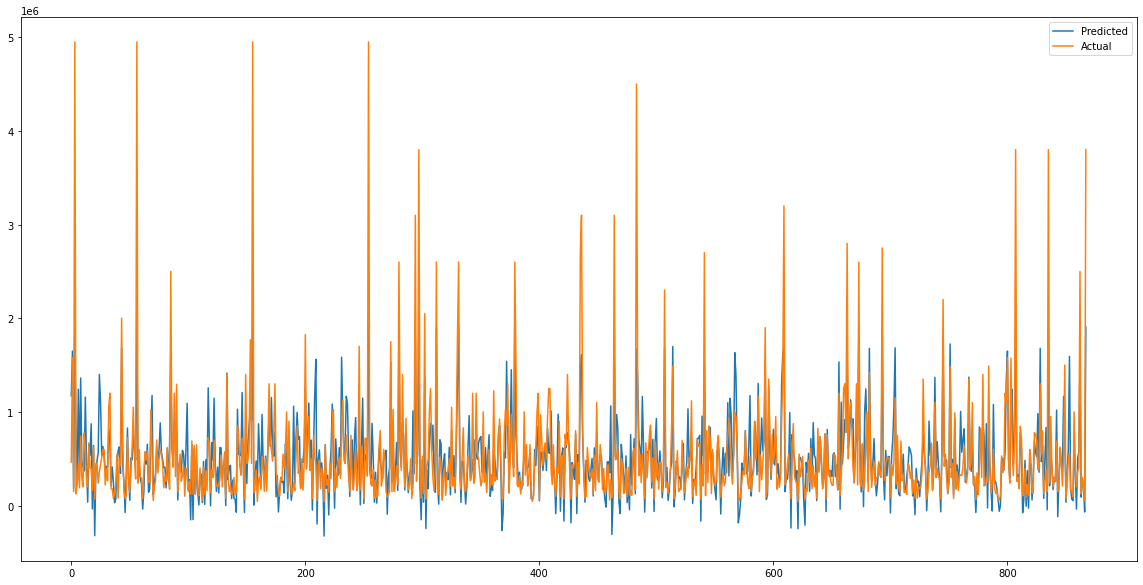

In [ ]:
plt.figure(figsize=(20,10))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 157423712096.09735
RMSE : 396766.57129362266
R2 : 0.5760786260078764
Adjusted R2 :  0.5655557550222563


### **Ridge Regularization**



In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -162038740930.8387


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

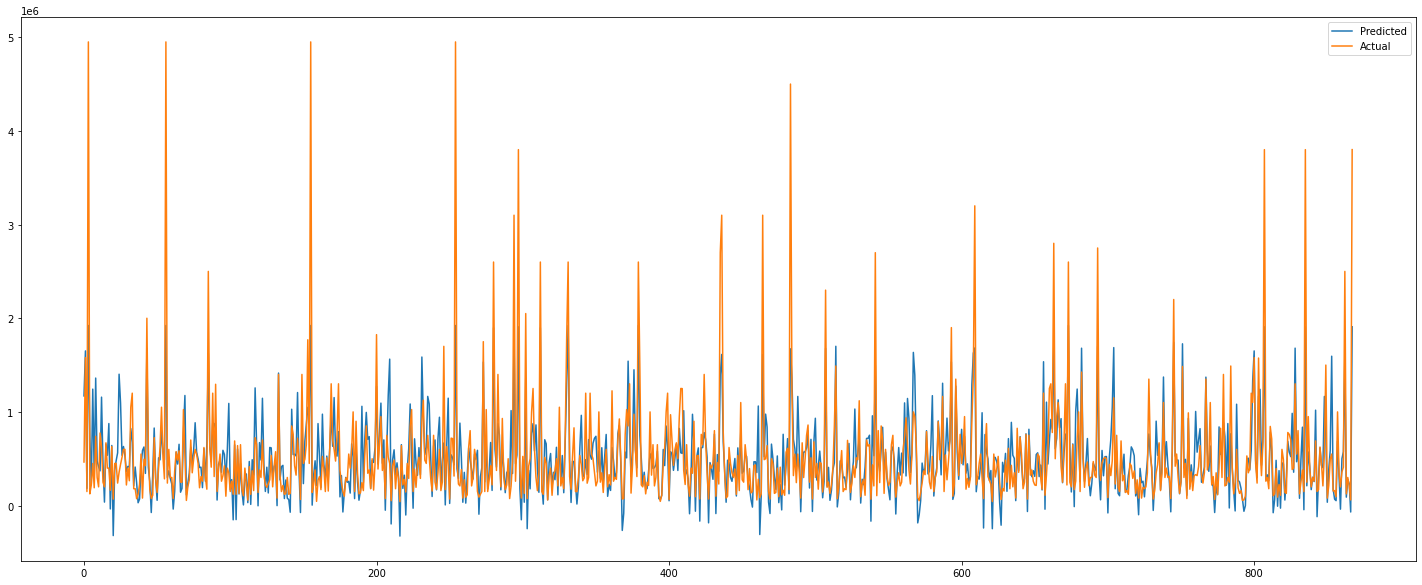

In [ ]:
plt.figure(figsize=(25,10))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 157392401695.69354
RMSE : 396727.11237788317
R2 : 0.5761629408025328
Adjusted R2 :  0.5656421627373474
